# Part 2. Classification
Predict breast cancer based on features.
(2 for benign, 4 for malignant)

## 0. Setup

In [157]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

sns.set_style('darkgrid')
dataset = pd.read_csv('data/cancer-classification.csv')
dataset = dataset.drop(['Index', 'Id'], axis = 1)
dataset.head()

,Clump Thickness,Uniformity of Cell Size,Uniformity of Cell Shape,Marginal Adhesion,Single Epithelial Cell Size,Bare Nuclei,Bland Chromatin,Normal Nucleoli,Mitoses,Class
0,5,1,1,1,2,1,3,1,1,2
1,5,4,4,5,7,10,3,2,1,2
2,3,1,1,1,2,2,3,1,1,2
3,6,8,8,1,3,4,3,7,1,2
4,4,1,1,3,2,1,3,1,1,2


In [158]:
dataset.count()

Clump Thickness                598
Uniformity of Cell Size        598
Uniformity of Cell Shape       598
Marginal Adhesion              598
Single Epithelial Cell Size    598
Bare Nuclei                    598
Bland Chromatin                598
Normal Nucleoli                598
Mitoses                        598
Class                          598
dtype: int64

## 1. Data investigation
(5 points)
Analyse distribution of features and target variables. Have a look on statistics. As visualization.
For continuous features you can use histograms and box plots, for categorical bar charts.
Investigate outliers. Analyze correlations between features and target.

array([[<AxesSubplot:title={'center':'Clump Thickness'}>,
        <AxesSubplot:title={'center':'Uniformity of Cell Size'}>,
        <AxesSubplot:title={'center':'Uniformity of Cell Shape'}>],
       [<AxesSubplot:title={'center':'Marginal Adhesion'}>,
        <AxesSubplot:title={'center':'Single Epithelial Cell Size'}>,
        <AxesSubplot:title={'center':'Bland Chromatin'}>],
       [<AxesSubplot:title={'center':'Normal Nucleoli'}>,
        <AxesSubplot:title={'center':'Mitoses'}>,
        <AxesSubplot:title={'center':'Class'}>]], dtype=object)

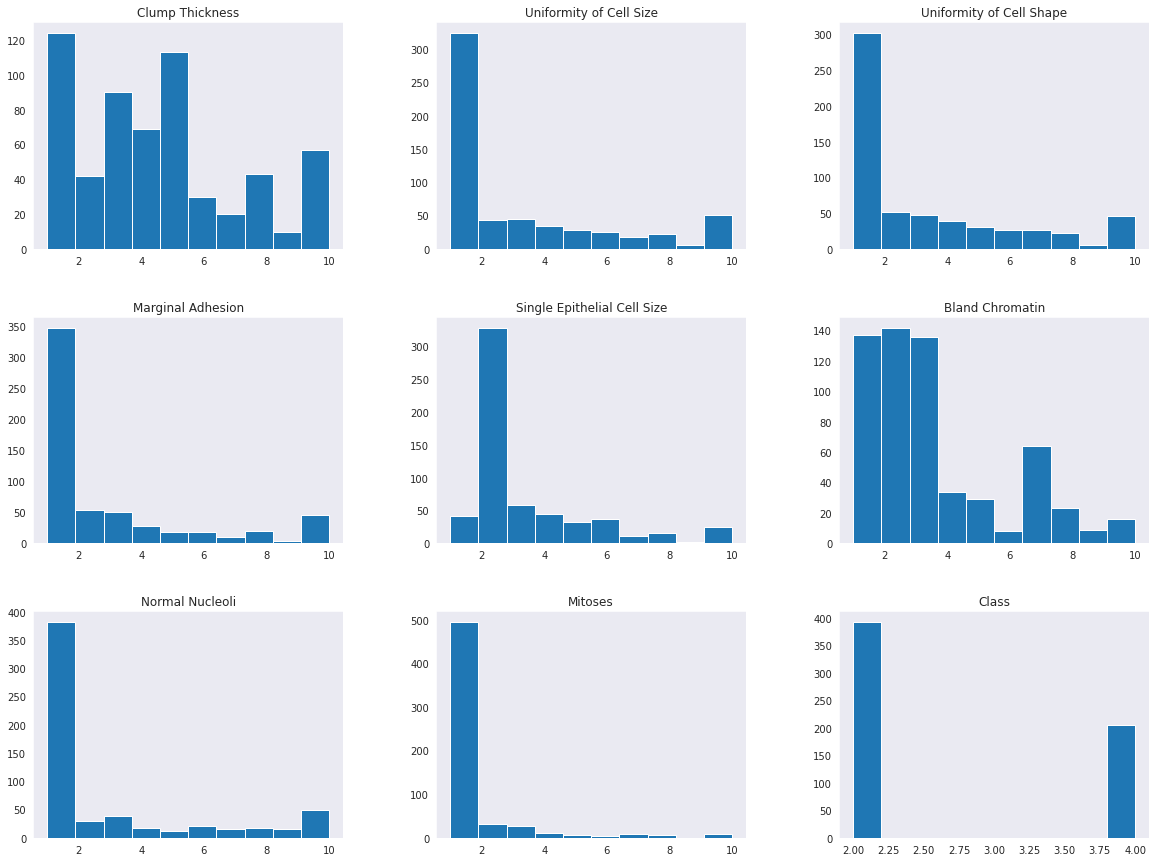

In [159]:
dataset.hist(figsize=(20, 15), grid=False)

In [160]:
dataset.describe()

,Clump Thickness,Uniformity of Cell Size,Uniformity of Cell Shape,Marginal Adhesion,Single Epithelial Cell Size,Bland Chromatin,Normal Nucleoli,Mitoses,Class
count,598.000000,598.000000,598.000000,598.000000,598.000000,598.000000,598.000000,598.000000,598.000000
mean,4.419732,3.088629,3.158863,2.769231,3.200669,3.396321,2.832776,1.560201,2.685619
std,2.797357,2.975135,2.916455,2.823138,2.187187,2.429947,3.028419,1.621326,0.950092
min,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,2.000000
25%,2.000000,1.000000,1.000000,1.000000,2.000000,2.000000,1.000000,1.000000,2.000000
50%,4.000000,1.000000,1.000000,1.000000,2.000000,3.000000,1.000000,1.000000,2.000000
75%,6.000000,5.000000,5.000000,3.000000,4.000000,4.000000,3.000000,1.000000,4.000000
max,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,4.000000


In [161]:
dataset.isnull().sum()

Clump Thickness                0
Uniformity of Cell Size        0
Uniformity of Cell Shape       0
Marginal Adhesion              0
Single Epithelial Cell Size    0
Bare Nuclei                    0
Bland Chromatin                0
Normal Nucleoli                0
Mitoses                        0
Class                          0
dtype: int64

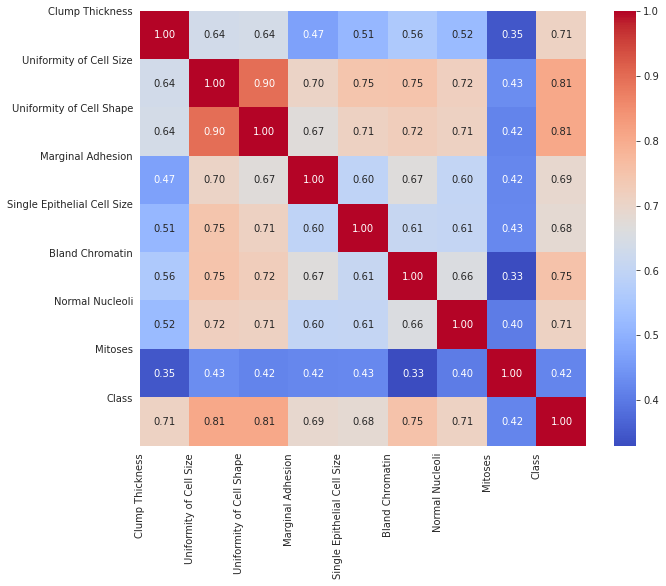

In [162]:
corr = dataset.corr()
fig, ax = plt.subplots(figsize=(10, 8))
sns.heatmap(corr, cmap='coolwarm', annot=True, fmt=".2f")
plt.xticks(range(len(corr.columns)), corr.columns)
plt.yticks(range(len(corr.columns)), corr.columns)
plt.show()

## 2. Data preprocessing
(5 points)
Convert non-numerical features to dummy variables.
Scale features or target if necessary.
Split dataset into train, test and cross validation sets.

In [163]:
dataset = pd.get_dummies(dataset)

In [164]:
dataset.head()

,Clump Thickness,Uniformity of Cell Size,Uniformity of Cell Shape,Marginal Adhesion,Single Epithelial Cell Size,Bland Chromatin,Normal Nucleoli,Mitoses,Class,Bare Nuclei_1,Bare Nuclei_10,Bare Nuclei_2,Bare Nuclei_3,Bare Nuclei_4,Bare Nuclei_5,Bare Nuclei_6,Bare Nuclei_7,Bare Nuclei_8,Bare Nuclei_9,Bare Nuclei_?
0,5,1,1,1,2,3,1,1,2,1,0,0,0,0,0,0,0,0,0,0
1,5,4,4,5,7,3,2,1,2,0,1,0,0,0,0,0,0,0,0,0
2,3,1,1,1,2,3,1,1,2,0,0,1,0,0,0,0,0,0,0,0
3,6,8,8,1,3,3,7,1,2,0,0,0,0,1,0,0,0,0,0,0
4,4,1,1,3,2,3,1,1,2,1,0,0,0,0,0,0,0,0,0,0


As 'Uniformity of Cell Size' and 'Uniformity of Cell Shape' have strong correlation (0.9)<br/>
It will be a good decision to drop 'Uniformity of Cell Shape' feature.

In [165]:
# separate features and target
X = dataset.drop(['Uniformity of Cell Shape', 'Class'], axis = 1).values
# X = dataset.values
y = dataset['Class'].values.reshape(-1,1)

### Splitting the dataset into the Training set and Test set

In [166]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.40)

In [167]:
print("Shape of X_train:\t", X_train.shape)
print("Shape of X_test:\t", X_test.shape)
print("Shape of y_train:\t", y_train.shape)
print("Shape of y_test:\t", y_test.shape)

Shape of X_train:	 (358, 18)
Shape of X_test:	 (240, 18)
Shape of y_train:	 (358, 1)
Shape of y_test:	 (240, 1)


## 3. Training
(20 points)
* Train and evaluate on validation set, play with hyper parameters:
    * Logistic Regression
    * SVM
    * Gradient Boosting Classifier
* Check precision, recall, F1-score metrics, what is more important for you?
* Chose best model based on validation and test set.
* Write which experiments give you the best results.

### Metric Import

In [168]:
from sklearn.metrics import precision_score, recall_score, f1_score
from copy import deepcopy

### Logistic Regression

In [169]:
from sklearn.linear_model import LogisticRegression

X_train1, X_test1, y_train1, y_test1 = deepcopy(X_train), deepcopy(X_test), deepcopy(y_train), deepcopy(y_test)

clf1 = LogisticRegression().fit(X_train1, y_train1)
y_pred_LR = clf1.predict(X_test1)

print(f"precision_score:\t{precision_score(y_test1, y_pred_LR, average='macro')}")
print(f"recall_score:\t\t{recall_score(y_test1, y_pred_LR, average='macro')}")
print(f"f1_score:\t\t{f1_score(y_test1, y_pred_LR, average='macro')}")

precision_score:	0.95625
recall_score:		0.9591555939932385
f1_score:		0.9576794216187621


/home/fenix/pr/ai_course/lab_1/venv/lib/python3.8/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


### SVM

In [170]:
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC

X_train2, X_test2, y_train2, y_test2 = deepcopy(X_train), deepcopy(X_test), deepcopy(y_train), deepcopy(y_test)

clf2 = make_pipeline(StandardScaler(), SVC(gamma='auto'))
clf2.fit(X_train2, y_train2)
y_pred_SVC = clf2.predict(X_test2)

print(f"precision_score:\t{precision_score(y_test2, y_pred_SVC, average='macro')}")
print(f"recall_score:\t\t{recall_score(y_test2, y_pred_SVC, average='macro')}")
print(f"f1_score:\t\t{f1_score(y_test2, y_pred_SVC, average='macro')}")

precision_score:	0.9539209632602655
recall_score:		0.9623791178551773
f1_score:		0.9579431063688935


/home/fenix/pr/ai_course/lab_1/venv/lib/python3.8/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


### Gradient Boosting Classifier

In [171]:
from sklearn.ensemble import GradientBoostingClassifier

X_train3, X_test3, y_train3, y_test3 = deepcopy(X_train), deepcopy(X_test), deepcopy(y_train), deepcopy(y_test)

clf3 = GradientBoostingClassifier()
clf3.fit(X_train3, y_train3)
y_pred_GBC = clf3.predict(X_test3)

print(f"precision_score:\t{precision_score(y_test3, y_pred_GBC, average='macro')}")
print(f"recall_score:\t\t{recall_score(y_test3, y_pred_GBC, average='macro')}")
print(f"f1_score:\t\t{f1_score(y_test3, y_pred_GBC, average='macro')}")

/home/fenix/pr/ai_course/lab_1/venv/lib/python3.8/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


precision_score:	0.9519230769230769
recall_score:		0.9656026417171162
f1_score:		0.9581970544405953


The most important metric for us is precision score, because we want to maximize
the accuracy of positive tests so that we do not miss no one with the cancer.

The best model here is Gradient Boosting Classifier.
The current config give me the best results.

## References

- [Medical Costs Regression + HyperTuning + EDA](https://www.kaggle.com/tolgahancepel/medical-costs-regression-hypertuning-eda)
- [Logistic Regression](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html)
- [SVC](https://scikit-learn.org/stable/modules/generated/sklearn.svm.SVC.html)
- [Gradient Boosting Classifier](https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.GradientBoostingClassifier.html)
